In [6]:
#load liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
import warnings
warnings.filterwarnings('ignore')

In [7]:
sn=pd.read_csv("sonar.csv",names=['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21','s22','s23','s24','s25','s26','s27','s28','s29','s30','s31','s32','s33','s34','s35','s36','s37','s38','s39','s40','s41','s42','s43','s44','s45','s46','s47','s48','s49','s50','s51','s52','s53','s54','s55','s56','s57','s58','s59','s60','object'])
df=pd.DataFrame(data=sn)
df

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s52,s53,s54,s55,s56,s57,s58,s59,s60,object
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [8]:
df.dtypes

s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
s7        float64
s8        float64
s9        float64
s10       float64
s11       float64
s12       float64
s13       float64
s14       float64
s15       float64
s16       float64
s17       float64
s18       float64
s19       float64
s20       float64
s21       float64
s22       float64
s23       float64
s24       float64
s25       float64
s26       float64
s27       float64
s28       float64
s29       float64
s30       float64
           ...   
s32       float64
s33       float64
s34       float64
s35       float64
s36       float64
s37       float64
s38       float64
s39       float64
s40       float64
s41       float64
s42       float64
s43       float64
s44       float64
s45       float64
s46       float64
s47       float64
s48       float64
s49       float64
s50       float64
s51       float64
s52       float64
s53       float64
s54       float64
s55       float64
s56       

In [9]:
df.describe()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s51,s52,s53,s54,s55,s56,s57,s58,s59,s60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [10]:
df.isnull().sum()

s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
s7        0
s8        0
s9        0
s10       0
s11       0
s12       0
s13       0
s14       0
s15       0
s16       0
s17       0
s18       0
s19       0
s20       0
s21       0
s22       0
s23       0
s24       0
s25       0
s26       0
s27       0
s28       0
s29       0
s30       0
         ..
s32       0
s33       0
s34       0
s35       0
s36       0
s37       0
s38       0
s39       0
s40       0
s41       0
s42       0
s43       0
s44       0
s45       0
s46       0
s47       0
s48       0
s49       0
s50       0
s51       0
s52       0
s53       0
s54       0
s55       0
s56       0
s57       0
s58       0
s59       0
s60       0
object    0
Length: 61, dtype: int64

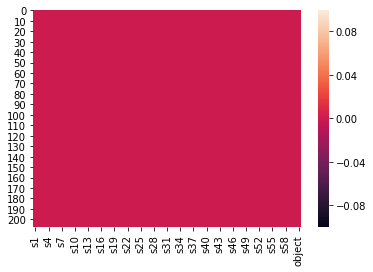

In [11]:
sns.heatmap(df.isnull())

In [19]:
x=df.drop("object",axis=1)
x.head()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s51,s52,s53,s54,s55,s56,s57,s58,s59,s60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [20]:
x.shape

(208, 60)

In [21]:
y=df["object"]
y.head()

0    R
1    R
2    R
3    R
4    R
Name: object, dtype: object

In [22]:
y.shape

(208,)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(162, 60)
(46, 60)
(162,)
(46,)


In [25]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8913043478260869
[[25  2]
 [ 3 16]]
              precision    recall  f1-score   support

           M       0.89      0.93      0.91        27
           R       0.89      0.84      0.86        19

    accuracy                           0.89        46
   macro avg       0.89      0.88      0.89        46
weighted avg       0.89      0.89      0.89        46



In [27]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)

predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.8260869565217391
[[23  4]
 [ 4 15]]
              precision    recall  f1-score   support

           M       0.85      0.85      0.85        27
           R       0.79      0.79      0.79        19

    accuracy                           0.83        46
   macro avg       0.82      0.82      0.82        46
weighted avg       0.83      0.83      0.83        46



In [28]:
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7391304347826086
[[27  0]
 [12  7]]
              precision    recall  f1-score   support

           M       0.69      1.00      0.82        27
           R       1.00      0.37      0.54        19

    accuracy                           0.74        46
   macro avg       0.85      0.68      0.68        46
weighted avg       0.82      0.74      0.70        46



In [29]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6956521739130435
[[18  9]
 [ 5 14]]
              precision    recall  f1-score   support

           M       0.78      0.67      0.72        27
           R       0.61      0.74      0.67        19

    accuracy                           0.70        46
   macro avg       0.70      0.70      0.69        46
weighted avg       0.71      0.70      0.70        46



In [30]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8478260869565217
[[22  5]
 [ 2 17]]
              precision    recall  f1-score   support

           M       0.92      0.81      0.86        27
           R       0.77      0.89      0.83        19

    accuracy                           0.85        46
   macro avg       0.84      0.85      0.85        46
weighted avg       0.86      0.85      0.85        46



In [31]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [33]:
svmkernel('rbf')

0.7391304347826086
[[27  0]
 [12  7]]
              precision    recall  f1-score   support

           M       0.69      1.00      0.82        27
           R       1.00      0.37      0.54        19

    accuracy                           0.74        46
   macro avg       0.85      0.68      0.68        46
weighted avg       0.82      0.74      0.70        46



In [34]:
svmkernel('poly')

0.5869565217391305
[[27  0]
 [19  0]]
              precision    recall  f1-score   support

           M       0.59      1.00      0.74        27
           R       0.00      0.00      0.00        19

    accuracy                           0.59        46
   macro avg       0.29      0.50      0.37        46
weighted avg       0.34      0.59      0.43        46



In [35]:
svmkernel('linear')

0.9130434782608695
[[25  2]
 [ 2 17]]
              precision    recall  f1-score   support

           M       0.93      0.93      0.93        27
           R       0.89      0.89      0.89        19

    accuracy                           0.91        46
   macro avg       0.91      0.91      0.91        46
weighted avg       0.91      0.91      0.91        46



In [ ]:
# for this data svm-"linear" is the best model for the calculation